In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
import matplotlib.pyplot as plt

In [ ]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

df = pd.DataFrame({
    "x": [-1, 0, 1, 2, 3, 4],
    "y" : [-3, -1, 1, 3, 5, 7]
})
df

,x,y
0,-1,-3
1,0,-1
2,1,1
3,2,3
4,3,5
5,4,7


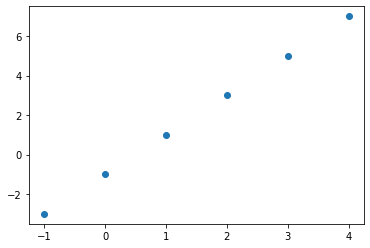

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ],name ='staright_line_model')

model.summary()

Model: "staright_line_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)

model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 574ms/step - loss: 15.9385
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 12.2746
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 7.5970
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 3.3553
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7381
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3057
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2376
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2515
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5814
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0765
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6521
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2077
Epoch 13/500
1/1 [==============================] - 0s 5m

In [ ]:
model.predict([-1])

array([[-3.2167096]], dtype=float32)

In [ ]:
model.predict([-1, 0, 1, 2, 3, 4])

array([[-3.2167099 ],
       [-1.0732195 ],
       [ 0.83432245],
       [ 2.767821  ],
       [ 4.579208  ],
       [ 6.387089  ]], dtype=float32)

In [ ]:
predicted_y = model.predict(x)
predicted_y

array([[-3.2167099 ],
       [-1.0732195 ],
       [ 0.83432245],
       [ 2.767821  ],
       [ 4.579208  ],
       [ 6.387089  ]], dtype=float32)

In [ ]:
model.predict([-1])[0][0]

<function seaborn.distributions.histplot>

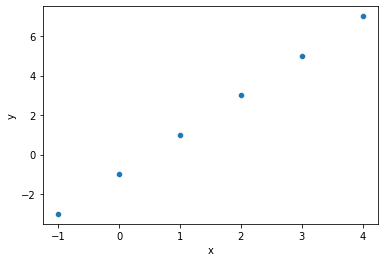

In [ ]:
import seaborn as sns
predicted_df = pd.DataFrame({
    "x" : x,
    "y" : y
})
sns.scatterplot(x='x', y='y', data=predicted_df)
sns.histplot

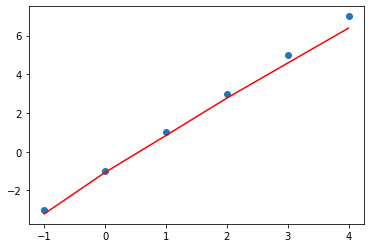

In [ ]:
plt.scatter(x, y)
plt.plot(x, predicted_y, color='red')
plt.show()

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0sz16fbq/assets


INFO:tensorflow:Assets written to: /tmp/tmp0sz16fbq/assets
